# **Import libraries and Loading  dataset**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, roc_auc_score, accuracy_score, classification_report, average_precision_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Loading dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/SIC/COVID19_Analysis&Prediction/final_data.csv')
#Identify Columns
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,2,27,2,2,2,2,2,2,2,2,2,2,2,2,1
1,2,1,2,24,2,2,2,2,2,2,2,2,2,2,2,1,1
2,1,2,2,54,2,2,2,2,2,2,2,2,1,2,2,2,1
3,2,2,1,30,2,2,2,2,2,2,2,2,2,2,2,2,1
4,1,2,2,60,2,1,2,2,2,1,2,1,2,2,2,1,1


# **Training model**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Mã hóa các biến phân loại
le = LabelEncoder()
for column in df.select_dtypes(include=['object', 'category']).columns:
    df[column] = le.fit_transform(df[column])
features = ['sex', 'patient_type', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid']
# Chia bô dữ liệu thành hai phần training data và test data
X = df[features]
y = df['covid_res']
X = X.values
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Size of X_train is:{}\nSize of Y_train is:{}\nSize of X_test is:{}\nSize of Y_test is:{}\n".format(X_train.shape, y_train.shape,
                                                                                                          X_test.shape, y_test.shape))

Size of X_train is:(397032, 16)
Size of Y_train is:(397032,)
Size of X_test is:(99259, 16)
Size of Y_test is:(99259,)



## **Linear Regression**

Multivariate Linear Regression Formula:
 covid_res = -0.4853684519771498 + 0.05426961919884633 * sex + 0.1310541973287605 * patient_type + -0.13901549156718981 * pneumonia + 0.0031056561320815523 * age + -0.02691589119834419 * pregnancy + -0.04077180905051631 * diabetes + 0.1057455368016624 * copd + 0.04504165618608364 * asthma + 0.1125158028001424 * inmsupr + -0.006377996236076359 * hypertension + 0.06632017602932726 * other_disease + 0.08875247012256358 * cardiovascular + -0.07727118683664853 * obesity + 0.08350280794731875 * renal_chronic + 0.06481496239181288 * tobacco + -0.016589694052934284 * contact_other_covid
Multivariate Model MSE: 0.22935301030677166
Multivariate Model R^2: 0.06966842173680632


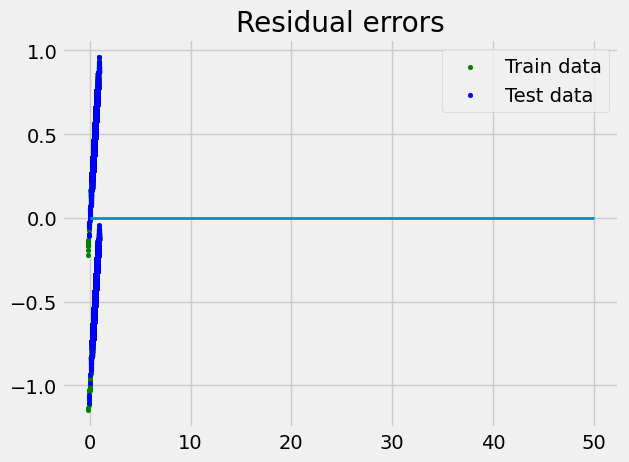

In [ ]:
from sklearn.linear_model import LinearRegression

# Multivariate linear regression
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predict and evaluate multivariate model
y_pred_multi = multi_model.predict(X_test)
multi_mse = mean_squared_error(y_test, y_pred_multi)
multi_r2 = r2_score(y_test, y_pred_multi)

# Print multivariate linear formula
multi_formula = " + ".join([f"{coef} * {name}" for coef, name in zip(multi_model.coef_, features)])
print(f"Multivariate Linear Regression Formula:\n covid_res = {multi_model.intercept_} + {multi_formula}")
print(f"Multivariate Model MSE: {multi_mse}")
print(f"Multivariate Model R^2: {multi_r2}")

plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(multi_model.predict(X_train), multi_model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(multi_model.predict(X_test), multi_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_model=LogisticRegression(C=0.03, solver='liblinear')
LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)
y_pred_prob = LR_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Logistics Regression\nAccuracy: {accuracy}")
print("Classification Report:")
print(report)

Logistics Regression
Accuracy: 0.6287691796209915
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.84      0.72     55478
           1       0.64      0.36      0.46     43781

    accuracy                           0.63     99259
   macro avg       0.63      0.60      0.59     99259
weighted avg       0.63      0.63      0.60     99259



### **Random Forest**

In [ ]:
#Bảo #Yến (train)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Random Forest\nAccuracy: {accuracy}")
print("Classification Report:")
print(report)

Random Forest
Accuracy: 0.6239534954009208
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.84      0.71     55478
           1       0.63      0.35      0.45     43781

    accuracy                           0.62     99259
   macro avg       0.63      0.60      0.58     99259
weighted avg       0.63      0.62      0.60     99259



### **Gradient Boosting**



In [ ]:
#An
#Đạt
#(2 bạn tự phân chia train model và test)

from sklearn.ensemble import GradientBoostingClassifier

gbk_model = GradientBoostingClassifier(random_state=100, n_estimators=500,min_samples_split=100, max_depth=6)
gbk_model.fit(X_train, y_train)
y_pred = gbk_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Gradient Boosting\nAccuracy: {accuracy}")
print("Classification Report:")
print(report)



Gradient Boosting
Accuracy: 0.6337662075983034
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.72     55478
           1       0.66      0.35      0.46     43781

    accuracy                           0.63     99259
   macro avg       0.64      0.60      0.59     99259
weighted avg       0.64      0.63      0.61     99259



### **XGBoost**

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"XGBoost\nAccuracy: {accuracy}")
print("Classification Report:")
print(report)

XGBoost
Accuracy: 0.6340986711532456
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.72     55478
           1       0.66      0.35      0.46     43781

    accuracy                           0.63     99259
   macro avg       0.64      0.60      0.59     99259
weighted avg       0.64      0.63      0.61     99259



### **LightGBM**

In [ ]:
import lightgbm as lgb

params = {
'objective': 'binary', # for binary classification task
'metric': 'binary_logloss', # evaluation metric
'boosting_type': 'gbdt', # gradient boosting type
'num_leaves': 31,
'learning_rate': 0.05,
'feature_fraction': 0.9,
'bagging_fraction': 0.8,
'bagging_freq': 5,
'verbose': 0
}

# Training the model
num_rounds = 100 # Number of boosting rounds (trees)
train_data = lgb.Dataset(X_train, label=y_train)
model = lgb.train(params, train_data, num_rounds)

# Predicting on the test set
y_pred_binary = [round(pred) for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)
print(f"LightGBM\nAccuracy: {accuracy}")
print("Classification Report:")
print(report)

LightGBM
Accuracy: 0.6239534954009208
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.84      0.71     55478
           1       0.63      0.35      0.45     43781

    accuracy                           0.62     99259
   macro avg       0.63      0.60      0.58     99259
weighted avg       0.63      0.62      0.60     99259

